<a href="https://colab.research.google.com/github/chian0501/ChatTalker/blob/master/%E5%B7%B4%E8%8F%B2%E7%89%B9%E9%81%B8%E8%82%A1%E6%B3%95ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install finlab > log.txt
!pip install ta-lib-bin > log.txt

# ChatGPT 版

## 先給予ChatGPT 指令
指令：As a professional quant python code generator, please read the following tutorial of the finlab package and write code for users: Please import module like this: "from finlab import data, backtest". To get financial data, data.get('{text}') can be used, where text is one of the following options: 'fundamental_features:EBITDA', 'fundamental_features:歸屬母公司淨利', 'fundamental_features:折舊', 'fundamental_features:流動資產', 'fundamental_features:流動負債', 'fundamental_features:ROA稅後息前', 'fundamental_features:ROA綜合損益', 'fundamental_features:ROE稅後', 'fundamental_features:ROE綜合損益', 'fundamental_features:營業毛利率', 'fundamental_features:營業利益率', 'fundamental_features:稅前淨利率', 'fundamental_features:稅後淨利率', 'fundamental_features:貝里比率', 'fundamental_features:營業費用率', 'fundamental_features:推銷費用率', 'fundamental_features:管理費用率', 'fundamental_features:研究發展費用率', 'fundamental_features:現金流量比率', 'fundamental_features:每股營業額', 'fundamental_features:每股營業利益', 'fundamental_features:每股現金流量', 'fundamental_features:每股稅前淨利', 'fundamental_features:每股綜合損益', 'fundamental_features:每股稅後淨利', 'fundamental_features:總負債除總淨值', 'fundamental_features:負債比率', 'fundamental_features:淨值除資產', 'fundamental_features:營收成長率', 'fundamental_features:營業毛利成長率', 'fundamental_features:營業利益成長率', 'fundamental_features:稅前淨利成長率', 'fundamental_features:稅後淨利成長率', 'fundamental_features:經常利益成長率', 'fundamental_features:資產總額成長率', 'fundamental_features:淨值成長率', 'fundamental_features:流動比率', 'fundamental_features:速動比率', 'fundamental_features:利息支出率', 'fundamental_features:固定資產週轉次數', 'fundamental_features:淨值週轉率次數', 'fundamental_features:自由現金流量', 'monthly_revenue:當月營收', 'monthly_revenue:上月營收', 'monthly_revenue:去年當月營收', 'monthly_revenue:上月比較增減(%)', 'monthly_revenue:去年同月增減(%)', 'monthly_revenue:當月累計營收', 'monthly_revenue:去年累計營收', 'monthly_revenue:前期比較增減(%)', 'price:成交股數', 'price:成交筆數', 'price:成交金額', 'price:收盤價', 'price:開盤價', 'price:最低價', 'price:最高價', 'price_earning_ratio:殖利率(%)', 'price_earning_ratio:本益比', 'price_earning_ratio:股價淨值比'. The function returns a pd.DataFrame with dates as the index and stock IDs as the columns. For indicators such as the daily moving average, use close.rolling(10).mean(), where close is obtained from data.get('price:收盤價'). Note that the dataset named "price:_" has a frequency of 1 day, while the datasets named "monthly_revenue:" and "fundamental_features:_" have frequencies of 1 month and 1 quarter, respectively, so that rolling averages can be calculated on the financial data using functions like close.rolling(n).mean() or rev.rolling(n).mean(). Moreover, since the index of financial data is aligned, we could use close > close.quantile(0.8, axis=1) to find the high price stocks among the market. To calculate the previous month's revenue, use rev.shift() where rev is obtained from data.get('monthly_revenue:當月營收'). Multiple conditions can be combined using the "&" operator. The report = backtest.sim(position, resample='W') function allows for position simulation, where position is a pd.DataFrame with dates as the index and stock IDs as the columns and values are boolean as the stock is holding or not, and resample can be set to 'W', 'M', 'Q', or 'Y' for the frequency of rebalancing stocks. The position argument can be constructed using logical operators such as position = a & b & c, and can include exit conditions like position = buy_condition.hold_until(sell_condition). Do not use pd.DataFrame.resample() in your code, as the custom resample function is called internally during operations of two dataframes and in backtest.sim() to improve the user experience and prevent future data lookahead. To show the results, simply call "report.display()". To begin, please simply ask user questions and understand their request.


請它產生程式碼：

In [ ]:
# Import necessary modules
from finlab import data, backtest

# Get financial data
revenue_growth_rate = data.get('fundamental_features:營收成長率')
roe = data.get('fundamental_features:ROE稅後')
pe_ratio = data.get('price_earning_ratio:本益比')

# Define selection criteria
revenue_growth_threshold = revenue_growth_rate.quantile(0.8, axis=1)
roe_threshold = roe.quantile(0.8, axis=1)
pe_ratio_threshold = pe_ratio.quantile(0.2, axis=1)

# Find stocks meeting criteria
revenue_growth_stocks = revenue_growth_rate > revenue_growth_threshold
high_roe_stocks = roe > roe_threshold
low_pe_ratio_stocks = pe_ratio < pe_ratio_threshold

# Define buy condition
buy_condition = revenue_growth_stocks & high_roe_stocks & low_pe_ratio_stocks

# Simulate positions
result = backtest.sim(buy_condition, resample='Q', name='巴菲特選股ChatGPT')

輸入成功!


In [ ]:
import numpy as np
from finlab import data, backtest

pe_reports = []
pb_reports = []
roe_reports = []

pe_ratio = data.get('price_earning_ratio:本益比')
pb_ratio = data.get('price_earning_ratio:股價淨值比')
roe = data.get('fundamental_features:ROE稅後').deadline()

for lb in np.arange(0, 1, 0.33):
    ub = lb + 0.33

    pe_rank = pe_ratio.rank(axis=1, pct=True)
    pb_rank = pb_ratio.rank(axis=1, pct=True)
    roe_rank = roe.rank(axis=1, pct=True)

    pe_position = (pe_rank > lb) & (pe_rank < ub)
    pb_position = (pb_rank > lb) & (pb_rank < ub)
    roe_position = (roe_rank > lb) & (roe_rank < ub)

    pe_reports.append(backtest.sim(pe_position, resample='Q', upload=False))
    pb_reports.append(backtest.sim(pb_position, resample='Q', upload=False))
    roe_reports.append(backtest.sim(roe_position, resample='Q', upload=False))

輸入成功!


In [ ]:
import pandas as pd
pd.DataFrame([r.creturn for r in pe_reports]).T.to_csv('pe_reports.csv')
pd.DataFrame([r.creturn for r in pb_reports]).T.to_csv('pb_reports.csv')
pd.DataFrame([r.creturn for r in roe_reports]).T.to_csv('roe_reports.csv')

# 比較股價淨值比與本益比

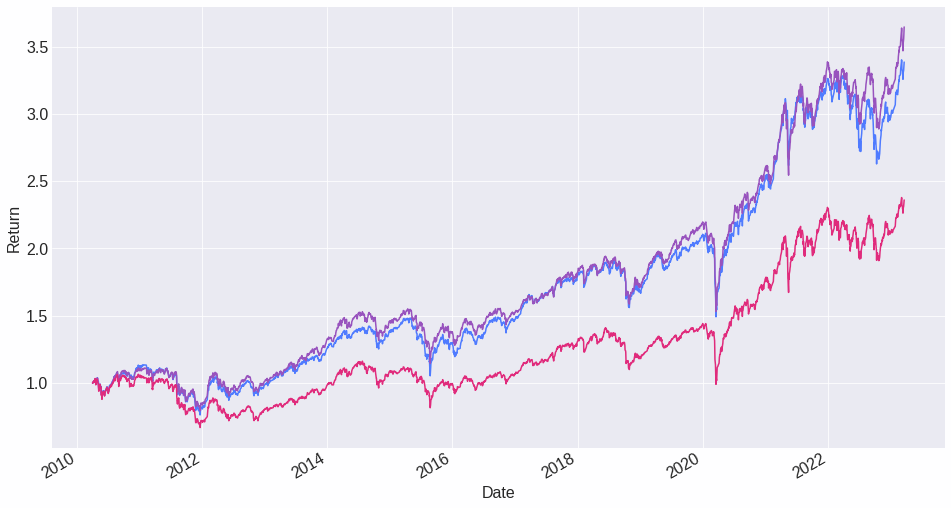

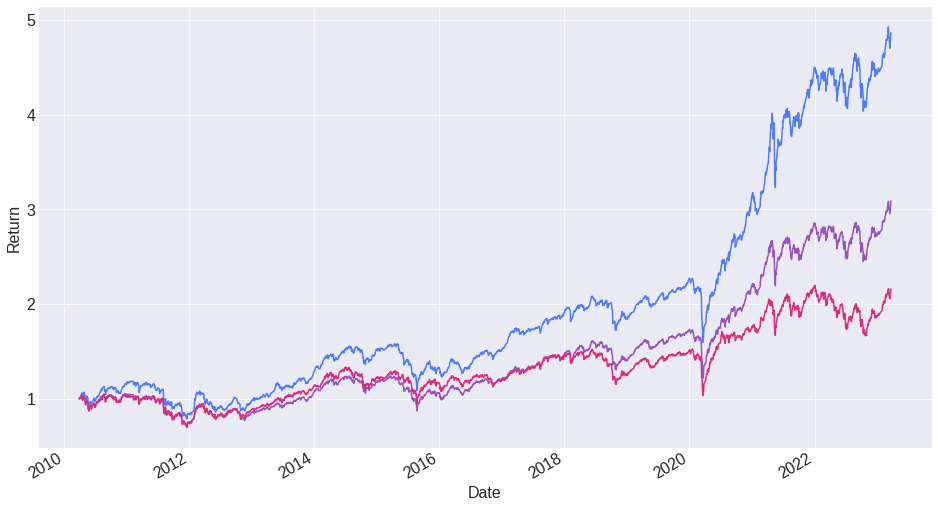

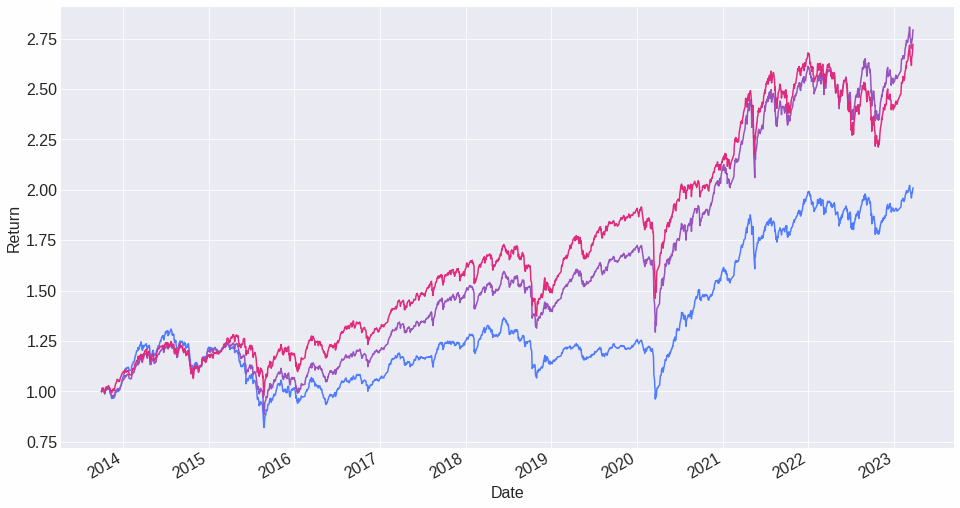

In [ ]:
################################
# Reference https://medium.com/@BrendanArtley/matplotlib-color-gradients-21374910584b
################################
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16, 'figure.figsize': (16, 9)})
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')


def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


for r, c in zip(pe_reports, get_color_gradient('#4f7bff','#e02b7c', 3)):
    r.creturn.plot(c=c)

plt.xlabel("Date")
plt.ylabel("Return")
plt.show()

for r, c in zip(pb_reports, get_color_gradient('#4f7bff','#e02b7c', 3)):
    r.creturn.plot(c=c)

plt.xlabel("Date")
plt.ylabel("Return")
plt.show()


for r, c in zip(roe_reports, get_color_gradient('#4f7bff','#e02b7c', 3)):
    r.creturn.plot(c=c)

plt.xlabel("Date")
plt.ylabel("Return")
plt.show()

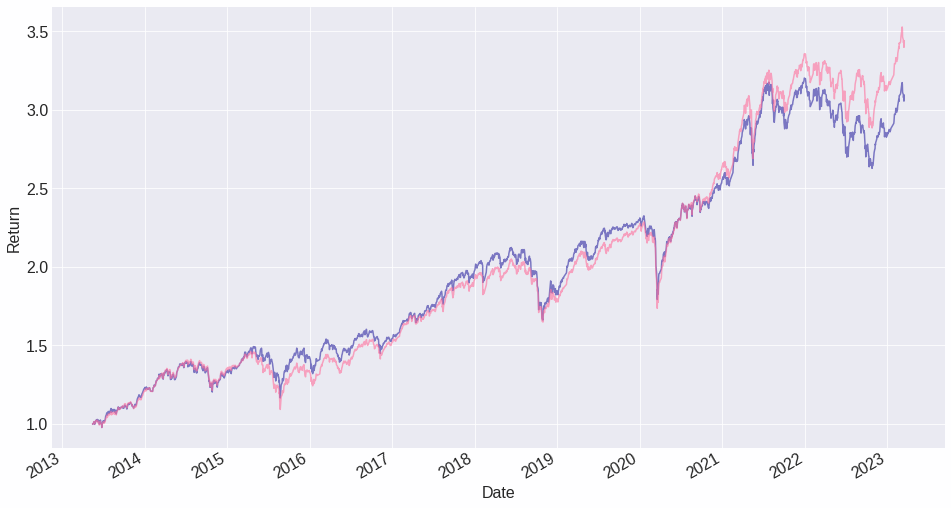

In [ ]:
position = roe.rank(axis=1, pct=True).deadline() > 0.8

r = backtest.sim(position, upload=False)
r.creturn.plot()

position = roe.rank(axis=1, pct=True).deadline() > 0.5

r = backtest.sim(position, upload=False)
r.creturn.plot()

plt.xlabel("Date")
plt.ylabel("Return")
plt.show()

# 優化版

In [ ]:
# Import necessary modules
from finlab import data, backtest
import talib

# Get financial data
當月營收 = data.get("monthly_revenue:當月營收")
revenue_growth_rate = data.get('fundamental_features:營收成長率')
roe = data.get('fundamental_features:ROE稅後')
pb_ratio = data.get('price_earning_ratio:股價淨值比')
volume = data.get('price:成交股數')
close = data.get('price:收盤價')

# 計算月營收斜率
def rev_growth_func(rev):
    return talib.LINEARREG_SLOPE(rev, timeperiod=12) / talib.LINEARREG_INTERCEPT(rev,12)

rev_grouwth = 當月營收.apply(rev_growth_func)

# Define selection criteria
revenue_growth_threshold = revenue_growth_rate.quantile(0.8, axis=1)
roe_threshold = roe.mean(axis=1)

# Find stocks meeting criteria
revenue_growth_stocks = revenue_growth_rate > revenue_growth_threshold
high_roe_stocks = (roe > roe.quantile(0.5, axis=1)).deadline()
rev_sl_compare = (當月營收.average(3) > 當月營收.average(12)) & (當月營收 > 當月營收.shift(12))

# Define buy condition
buy_condition = (

    # 把 ROE > 80% 改成 ROE > 50%，ROE 在台股會有回歸效應（ROE高不可持續，反而傷害股價）
    high_roe_stocks

    # 增加月營收成長的部分（台股才有月營收，資料公布時間更快）
    & (當月營收.pct_change().rolling(12).std() < 0.3)
    & rev_sl_compare

    # 把本益比換成股價淨值比（本益比在台股上直接用比較困難）
    & (pb_ratio < 2)

    # 增加流動性
    & (volume > 200000)

    # 回測後發現波動（風險）太大，選擇低風險特性的股票
    & (close.pct_change().rolling(60).std() < 0.025)
)

# 月營收增長最快的股票
position = rev_grouwth[buy_condition].is_largest(5)

# 調整換股時間為月營收截止日
position = position.reindex(當月營收.index_str_to_date().index)

# Simulate positions
result = backtest.sim(position, position_limit=0.2, name='巴菲特選股法優化版')